In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

## Class definition

In [2]:
class hh_neuron:
    
    def __init__(self, config={}):
        self.C = 1.
        self.g_Na = 120.
        self.g_K = 36.
        self.g_L = .3
        self.E_Na = 50.
        self.E_K = -77.
        self.E_L = -54.5
        self.I_ext = 10.
        self.I_syn = 0.
        self.tau_d = 3.
        self.tau_r = .1
        self.sim_n = 1
        
        if 'C' in config.keys():
            self.C = config['C']
        if 'g_Na' in config.keys():
            self.C = config['g_Na']
        if 'g_K' in config.keys():
            self.C = config['g_K']
        if 'g_L' in config.keys():
            self.C = config['g_L']
        if 'E_Na' in config.keys():
            self.C = config['E_Na']
        if 'E_K' in config.keys():
            self.C = config['E_K']
        if 'E_L' in config.keys():
            self.C = config['E_L']
        if 'I_ext' in config.keys():
            self.C = config['I_ext']
        if 'I_syn' in config.keys():
            self.C = config['I_syn']
        if 'tau_d' in config.keys():
            self.C = config['tau_d']
        if 'tau_r' in config.keys():
            self.C = config['tau_r']

    def alpha_m(self, V):
        """S5"""
        return .1 * (V + 40.) / (1. - np.exp(-(V + 40.) / 10.))

    def beta_m(self, V):
        """S6"""
        return 4. * np.exp(-(V + 65.) / 18.)

    def alpha_h(self, V):
        """S7"""
        return .07 * np.exp(-(V + 65.) / 20.)

    def beta_h(self, V):
        """S8"""
        return 1. / (1 + np.exp(-(V + 35.) / 10.))

    def alpha_n(self, V):
        """S9"""
        return ((V + 55.) / 10.) / (1. - np.exp((-.1) * (V + 55.)))

    def beta_n(self, V):
        """S10"""
        return .125 * np.exp(-(V + 65.) / 80.)

    def dm(self, V, m):
        """S2"""
        a = self.alpha_m(V)
        b = self.beta_m(V)

        return a * (1. - m) - b * m

    def dh(self, V, h):
        """S3"""
        a = self.alpha_h(V)
        b = self.beta_h(V)

        return a * (1. - h) - b * h

    def dn(self, V, n):
        """S4"""
        a = self.alpha_n(V)
        b = self.beta_n(V)

        return a * (1. - n) - b * n

    def dV(self, V, m, h, n):
        """S1"""
        return (- self.g_Na * m ** 3 * h * (V - self.E_Na) 
                - self.g_K * n ** 4 * (V - self.E_K) 
                - self.g_L * (V - self.E_L) 
                + self.I_ext + self.I_syn ) / self.C

## Configuration

In [3]:
hh_config = {
    'C': 1.,
    'g_Na': 120.,
    'g_K': 36.,
    'g_L': .3,
    'E_Na': 50.,
    'E_K': -77.,
    'E_L': -54.5,
    'I_ext': 10.
}

tau_d = 3.
tau_r = .1
N = 500.

step_size = .02
t0 = 0.
m0 = 0.
h0 = 0.
n0 = 0.
V0 = - 30.

t_end = 120.

t = np.arange(t0, t_end, step_size)
m = np.zeros(t.size)
m[0] = m0
h = np.zeros(t.size)
h[0] = h0
n = np.zeros(t.size)
n[0] = n0 
V = np.zeros(t.size)
V[0] = V0

hh_1 = hh_neuron(hh_config)

## Simulation

In [4]:
for i in range(1, t.size):
    
    # intermediate
    m_i = m[i - 1] + step_size * hh_1.dm(V[i - 1], m[i - 1])
    h_i = h[i - 1] + step_size * hh_1.dh(V[i - 1], h[i - 1])
    n_i = n[i - 1] + step_size * hh_1.dn(V[i - 1], n[i - 1])
    V_i = V[i - 1] + step_size * hh_1.dV(V[i - 1], m[i], h[i], n[i])
 
    # heun
    m[i] = m[i - 1] + (step_size / 2.) * (hh_1.dm(V[i - 1], m[i - 1]) + hh_1.dm(V_i, m_i))
    h[i] = h[i - 1] + (step_size / 2.) * (hh_1.dh(V[i - 1], h[i - 1]) + hh_1.dh(V_i, h_i))
    n[i] = n[i - 1] + (step_size / 2.) * (hh_1.dn(V[i - 1], n[i - 1]) + hh_1.dn(V_i, n_i))
    V[i] = V[i - 1] + (step_size / 2.) * (hh_1.dV(V[i - 1], m[i], h[i], n[i]) + hh_1.dV(V_i, m[i], h[i], n[i]))
    

## Plotting

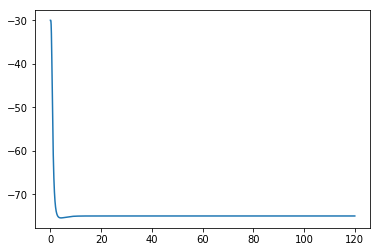

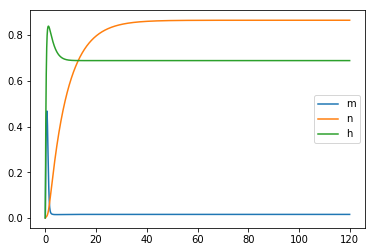

final V:  -75.01407983692934
final m:  0.015398087059238431
final h:  0.8651310465715563
final n:  0.6885116965918988


In [ ]:
plt.plot(t, V)
plt.show()
plt.plot(t, m)
plt.plot(t, h)
plt.plot(t, n)
plt.legend(["m", "n", "h"])
plt.show()
print("final V: ", V[-1])
print("final m: ", m[-1])
print("final h: ", h[-1])
print("final n: ", n[-1])